In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys


In [35]:
insurance=pd.read_csv('insurance.csv')

['age', 'bmi', 'children', 'premium']
['sex', 'smoker', 'region']


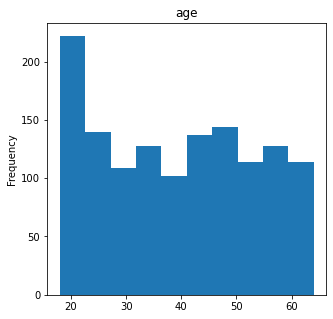

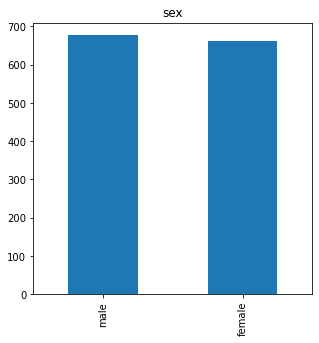

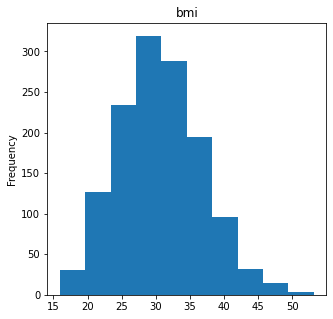

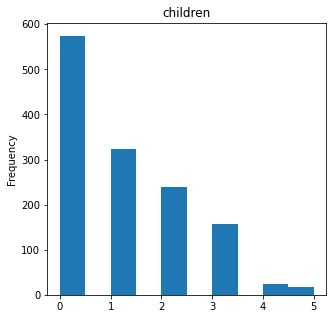

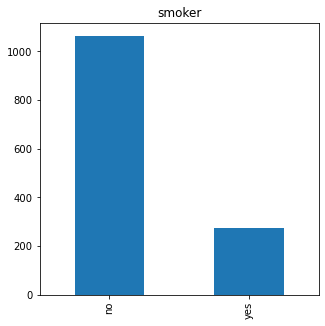

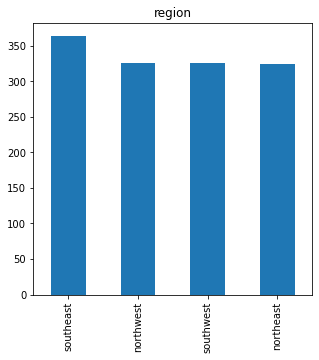

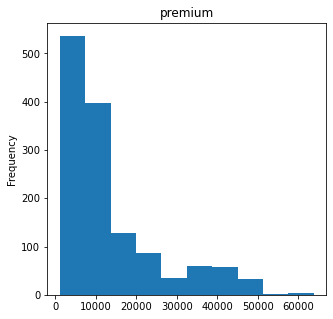

In [36]:
num_lst = []
cat_lst = []

from pandas.api.types import is_string_dtype, is_numeric_dtype

for column in insurance:
    plt.figure(column, figsize = (5,5))
    plt.title(column)
    if is_numeric_dtype(insurance[column]):
        insurance[column].plot(kind = 'hist')
        num_lst.append(column)
    elif is_string_dtype(insurance[column]):
        insurance[column].value_counts().plot(kind = 'bar')
        cat_lst.append(column)
        
print(num_lst)
print(cat_lst)

In [37]:
insurance.head()


,age,sex,bmi,children,smoker,region,premium
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [38]:
insurance.shape

(1338, 7)

In [39]:
insurance.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   premium   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [40]:
insurance.describe()

,age,bmi,children,premium
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [41]:
insurance.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
premium     False
dtype: bool

In [43]:
X = insurance.iloc[:, :-1].values 
y = insurance.iloc [:, -1].values 

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 1] = le.fit_transform(X[:, 1]) 
X[:, 4] = le.fit_transform(X[:, 4]) 

np.set_printoptions(threshold=sys.maxsize)


In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

np.set_printoptions(threshold=sys.maxsize)

In [48]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=0)

In [49]:
insurance.shape

(1338, 7)

In [12]:
insurance

,age,sex,bmi,children,smoker,region,premium
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


# Training the Polynomial Regression model on the Training set.

In [50]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(train_X)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_poly,train_y)

LinearRegression()

In [51]:
y_pred = model.predict(poly_reg.fit_transform(test_X))

In [52]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), test_y.reshape(len(test_y),1)),1)[:10])

[[11273.28  9724.53]
 [10512.78  8547.69]
 [53178.69 45702.02]
 [14758.28 12950.07]
 [ 9838.91  9644.25]
 [ 7472.5   4500.34]
 [ 2641.66  2198.19]
 [15295.25 11436.74]
 [10883.84  7537.16]
 [ 8160.28  5425.02]]


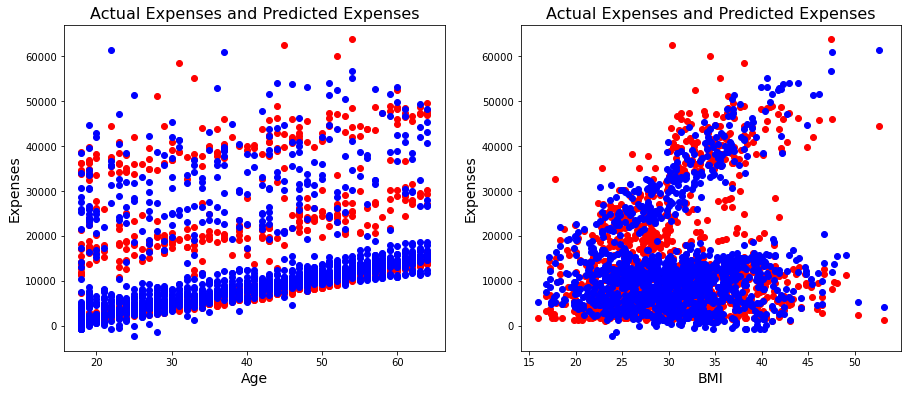

In [53]:
plt.subplots(figsize=(15,6))  

# Age vs Expenses
plt.subplot(1,2,1)
plt.scatter(insurance['age'], y, color = 'red')
plt.scatter(insurance['age'], model.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Actual Expenses and Predicted Expenses', fontsize = 16)
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Expenses',fontsize = 14)

# BMI vs Expenses
plt.subplot(1,2,2)
plt.scatter(insurance['bmi'], y, color = 'red')
plt.scatter(insurance['bmi'], model.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Actual Expenses and Predicted Expenses', fontsize = 16)
plt.xlabel('BMI', fontsize = 14)
plt.ylabel('Expenses',fontsize = 14)
plt.show()

In [54]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print("MSE : ",mean_squared_error(y_pred,test_y))
print("MAE : ",mean_absolute_error(y_pred,test_y))
print("R Score :",r2_score(y_pred,test_y))

MSE :  22177059.57693895
MAE :  3245.65887175
R Score : 0.8432777448263072


# Mulitple lr

In [55]:
model = LinearRegression()
model.fit(train_X,train_y)

LinearRegression()

In [56]:
y_pred = model.predict(test_X)

In [57]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), test_y.reshape(len(test_y),1)),1)[:10])

[[11169.93  9724.53]
 [ 9486.71  8547.69]
 [38181.12 45702.02]
 [16266.31 12950.07]
 [ 6914.65  9644.25]
 [ 3963.48  4500.34]
 [ 1579.4   2198.19]
 [14385.26 11436.74]
 [ 9012.58  7537.16]
 [ 7508.46  5425.02]]


In [58]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print("MSE : ",mean_squared_error(y_pred,test_y))
print("MAE : ",mean_absolute_error(y_pred,test_y))
print("R Score :",r2_score(y_pred,test_y))

MSE :  31827950.229523838
MAE :  3933.2726494052417
R Score : 0.7257340824453822
